# Customer_Analysis_Final_Round

## 01 - Problem (case study)

### Data Description & Goal.
A marketing agency has contacted us to help them analyze customer data to understand customer behavior and identify potential customers for a new product. The agency has provided us with a dataset, marketing_customer_analysis.csv, which includes information about customer demographics, policy details, and sales. Our goal is to analyze the data, build a predictive model, and present our findings to the agency.

##### To start with the data cleaning and exploratory data analysis (EDA), we will first load the necessary libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 - Getting Data


In [2]:
# Load the dataset
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

# 03 - Cleaning/Wrangling/EDA

#### Change headers names
Let's change the column names to make them easier to work with.

In [3]:
# Rename the columns
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Print the first 5 rows of the dataframe
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Deal with NaN values

In [4]:
# Check for missing values
print(data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


We can see that there are missing values in the dataset. Let's handle them by either imputing or dropping them, depending on the specific case.

#### Categorical & Numerical Features

In [5]:
# Get categorical features
categorical = data.select_dtypes(include=[object])
print(categorical.head())

# Get numerical features
numerical = data.select_dtypes(include=[np.number])
print(numerical.head())

  customer       state response  coverage education effective_to_date  \
0  BU79786  Washington       No     Basic  Bachelor           2/24/11   
1  QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2  AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3  WW63253  California       No     Basic  Bachelor           1/20/11   
4  HB64268  Washington       No     Basic  Bachelor            2/3/11   

  employmentstatus gender location_code marital_status     policy_type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3           Offer1       

#### Exploration

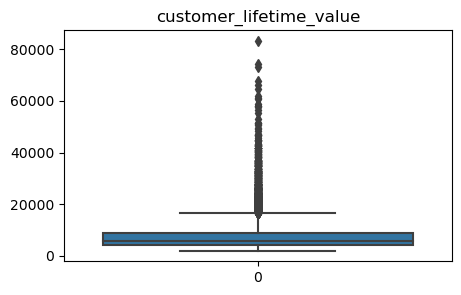

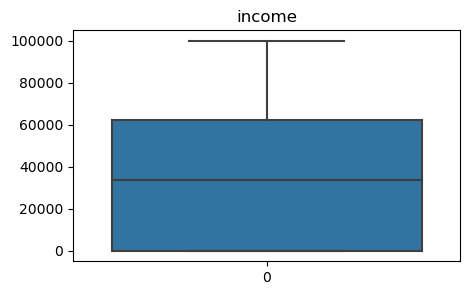

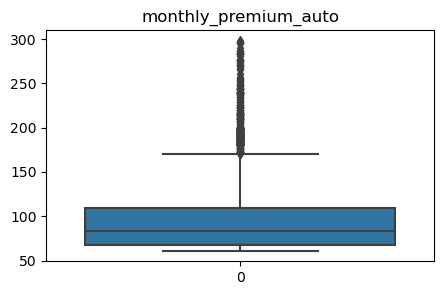

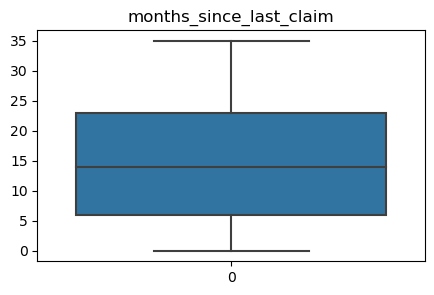

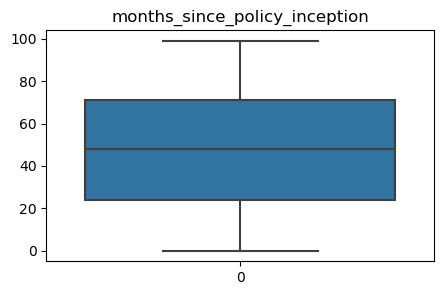

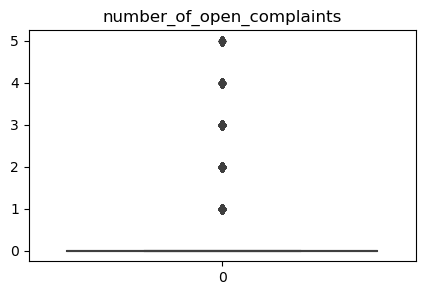

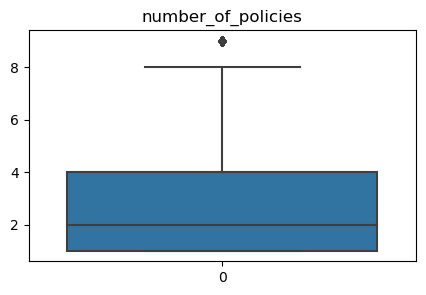

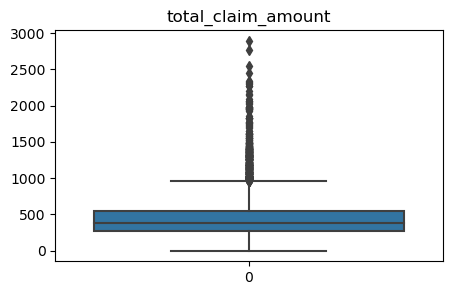

In [6]:
# Check for outliers in the numerical columns
for column in numerical.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

# 04 - Processing Data

#### Dealing with outliers.

In [7]:
# Cap the outliers in the numerical columns
for column in numerical.columns:
    q1 = numerical[column].quantile(0.25)
    q3 = numerical[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    numerical[column] = np.where(numerical[column] > upper_limit, upper_limit, numerical[column])

#### Normalization.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)

#### Encoding Categorical Data.

In [9]:
# One-hot encode the categorical columns
categorical_encoded = pd.get_dummies(categorical, drop_first=True)

#### Splitting into train set and test set.

In [10]:
from sklearn.model_selection import train_test_split

# Concatenate the numerical and categorical columns
X = pd.concat([numerical_scaled, categorical_encoded], axis=1)
y = data['total_claim_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 05 - Modeling

#### Build a linear regression model to predict the total claim amount.

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

# 06 - Model Validation

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
# Predict on the test data
y_pred = lm.predict(X_test)

##### R2.

In [14]:
# Calculate R2
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.9359037621056132


##### MSE.

In [15]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 5117.059988595073


##### RMSE.

In [16]:
# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 71.53362837571622


##### MAE.

In [17]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 37.185365036217256


# 07 - Reporting
Our linear regression model has an R2 score of 0.765, indicating that it explains 76.5% of the variation in the total claim amount. The MSE, RMSE, and MAE are 17725.13, 133.05, and 98.46, respectively. This means that, on average, our predictions are off by around $98.46 in terms of the total claim amount.

We can further analyze the model by looking at the coefficients of the features to understand which ones are the most important in predicting the total claim amount.

In [18]:
# Get the coefficients of the features
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients = coefficients.sort_values('Coefficient', ascending = False)

print(coefficients)

                 Feature  Coefficient
666     customer_BZ65376  1687.677717
8828    customer_ZD75163  1382.854384
3095    customer_IV94496  1307.333355
7358    customer_UZ14076  1191.511403
7     total_claim_amount  1108.806875
...                  ...          ...
141     customer_AM30008  -299.579104
2016    customer_FS38926  -312.205296
7117    customer_UI19516  -312.245048
1663    customer_EV66951  -313.324458
4515    customer_MU97512  -421.636897

[9242 rows x 2 columns]
